**Helmy's part begins**

In [732]:
import json
import pandas as pd
import re

with open("result1.json",encoding="utf8") as f:
    data=json.load(f)
    
females_data={}
males_data={}

## Data

In [733]:
def collect_data(form,dic,recNo):
    dic[recNo]={}
    for formLine in form:
        if(formLine=='' or formLine==' '):
            continue
        else:
            formLine=formLine.split('    ')
            formLine=list(filter(None,formLine))
            for record in formLine:
                record=record.split(':',1)
                if(len(record)<=1):
                    continue
                else:
                    record[0]=record[0].strip()
                    # Females Columns Cleaning (start)
                    if(record[0]=='لون البشرة.1'):
                        record[0]="color"
                    if(record[0]=='الوالدة' or record[0]=='وثلاثة في حضانة امهم' or record[0]=='- الوالده' or record[0]=='الوالده' or record[0]=='الام' or record[0]=='والدتي' or record[0]=='أمي'):
                        continue
                    if(record[0]=='hلتيسير الذي يمكن ان تقدمه لاتمام عملية الزواج' or record[0]=='ما هو شكل التيسير المقدم لاتمام عملية الزواج' or record[0]=='شكل التيسير المقدم' or record[0]=='شكل التيسير المقدم لاتمام الزواج'or record[0]=='شكل التيسير المقدم لاتمام عملية الزواج' or record[0]=='التيسير الذي يمكن ان تقدمه لاتمام عملية الزواج' or record[0]== 'لتيسير الذي يمكن ان تقدمه لاتمام عملية الزواج' or record[0]=='ما هو شكل التيسير الذي يمكن ان تقدميه لاتمام عملية الزواج'):
                        record[0]='التيسير المقدم لاتمام عملية الزواج'
                    if(record[0]=='اضافات ضرورية' or record[0]=='اضافات أخرى' or record[0]=='اضافات اخرى' or record[0]=='اضافات ضرورية.1' or record[0]=='هل تريدين اضافة شئ ترينه ضروريا؟' or record[0]=='هل تريدين إضافة شئ ترينه ضرورياً' or record[0]=='اضافت ضرورية' or record[0]=='أضافات ضرورية'):
                        record[0]='إضافات ضرورية'
                    if(record[0]=="الحالة الاجتماعية.1" or record[0]=='الحالة الاجتماعية لها' or record[0]=='حالة الأخت' or (record[0]=="الحالة الاجتماعية" and record[0] in dic[recNo].keys())):
                        record[0]='الحالة الإجتماعية المناسبة'
                    if(record[0]=='عدد الأولاد وأعمارهم وحضانتهم' or record[0]=='عدد الأولاد وأعماره وحضانتهم' or record[0]=='عدد الاولاد وحضانتهم'):
                        record[0]='عدد الأولاد وأعمارهم وحضانتهم إذا وجد'
                    if(record[0]=='الوظيفة او العمل ان وجد'):
                        record[0]='الوظيفة او العمل'
                    if(record[0]=='هل تحافظين علي السنن القولیة والفعلیة؟' or record[0]=='الخفاظ علي السنن القولیة والفعلیة' or record[0]=='الحفاظ السنن القولیة والفعلیة' or record[0]=='الحفاظ علي السنن القولیة والفعلیة'):
                        record[0]='الحفاظ على السنن القولیة والفعلیة'
                    if(record[0]=='هل تحافظين علي الصلاة في وقتها ؟'):
                        record[0]='الحفاظ علي الصلاة في وقتها'
                    if(record[0]=='حفظ القران الكريم' or record[0]=='مقدرا حفظ القران'):
                        record[0]='مقدار حفظ القران'
                    if(record[0]=='السن المناسب لكِ' or record[0]=='السن المناسب لها' or record[0]=='السن المناسب له'):
                        record[0]="السن المناسب"
                    if(record[0]=='المؤهل الذي تفضلينه' or record[0]=='المؤهل الذي تفضله' or record[0] =="المؤهل الذي يفضله"):
                        record[0]="المؤهل المفضل"
                    #end
                    # Males Columns Cleaning (start)
                    if(record[0]=='هل تدخن السجائر او غيرها' or record[0]=='تدخين السجائر'):
                        record[0]="تدخين السجائر او غيرها"
                    if(record[0]=='قيمة ونوع مهر الفتاة الذي يقدر عليه'):
                        record[0]='قيمة ونوع المهر'
                    if(record[0]=='ركود'):
                        record[0]="كود"
                    #end
                    dic[recNo][record[0]]=record[1].strip()

In [734]:
def getForm(text):
    global femalesRecord
    global malesRecord
    lines=text.split('\n')
    for line in lines:
        splits=line.split(':')
        for split in splits:
            if('كود' in split):
                form=text.split('\n')
                if('نساء' in form[0]):
                    femalesRecord+=1
                    collect_data(form,females_data,femalesRecord)
                elif('رجال' in form[0]):
                    malesRecord+=1
                    collect_data(form,males_data,malesRecord)                

In [735]:
femalesRecord=0
malesRecord=0
for message in data['messages']:
    if (message['type']=='message'):
        if type(message['text'])==list:
            i=0
            for txt in message['text']:
                if(type(txt)==dict):
                    message['text'][i]=txt['text']
                    i+=1
                else:
                    i+=1
            newTxt=''.join(message['text'])
            getForm(newTxt)
        else:
            getForm(message['text'])
females_df=pd.DataFrame.from_dict(females_data,orient='index')
males_df=pd.DataFrame.from_dict(males_data,orient='index')

In [736]:
males_df.columns=['code','age','weight','height','color','nationality','education','job','status','children','parents_jobs','family_address','area_level','future_resid','maintain_prayer_time','maintain_prayer_masjid','mem_quraan','maintain_sunnah','smoking','extras','accept_age','accept_weight','accept_height','accept_color','accept_education','accept_status','accept_dress','engage_period','mahr','activities']
females_df.columns=['code','age','weight','height','color','nationality','education','job','status','children','parents_jobs','family_address','area_level','dress','maintain_prayer','mem_quraan','maintain_sunnah','accept_age','accept_weight','accept_height','accept_color','accept_education','accept_status','engage_period','facilit','additions','accept_resid','accept_address','facilitations']


## **Creating new dataframe to save the clean data**

In [737]:
#creating new dataframe to save the clean data
new_males_df = males_df.copy()
new_females_df = females_df.copy()

In [738]:
#drop not needed columns for males
males_drops = ['accept_address','children','parents_jobs','family_address','mem_quraan','maintain_sunnah','smoking','extras','mahr','activities']
for x in males_drops:
    if(x in new_males_df.columns):
        new_males_df.drop(x, inplace=True, axis=1)
new_males_df.columns

Index(['code', 'age', 'weight', 'height', 'color', 'nationality', 'education',
       'job', 'status', 'area_level', 'future_resid', 'maintain_prayer_time',
       'maintain_prayer_masjid', 'accept_age', 'accept_weight',
       'accept_height', 'accept_color', 'accept_education', 'accept_status',
       'accept_dress', 'engage_period'],
      dtype='object')

In [739]:
#drop not needed columns for females
females_drops = ['accept_address','children','parents_jobs','family_address','mem_quraan','maintain_sunnah','facilitations','facilit','additions']
for x in females_drops:
    if(x in new_females_df.columns):
        new_females_df.drop(x, inplace=True, axis=1)
new_females_df.columns

Index(['code', 'age', 'weight', 'height', 'color', 'nationality', 'education',
       'job', 'status', 'area_level', 'dress', 'maintain_prayer', 'accept_age',
       'accept_weight', 'accept_height', 'accept_color', 'accept_education',
       'accept_status', 'engage_period', 'accept_resid'],
      dtype='object')

In [740]:
# females_df.head(10)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
## ***Cleaning Text**

In [741]:
#normalization for data
#!/usr/bin/python
# -*- coding: utf-8 -*-
from pyarabic.araby import tokenize
from pyarabic.araby import normalize_ligature
from pyarabic.araby import tokenize
import re 
import tashaphyne.arabic_const as arabconst 
def strip_tashkeel(text): 
    '''

>>> text=u"الْعَرَبِيّةُ"
>>> strip_tashkeel(text)
العربية

    '''
    return arabconst.HARAKAT_PAT.sub('', text)
def strip_tatweel(text): 

    return re.sub(u'[%s]' % arabconst.TATWEEL,    '', text) 

def normalize_hamza(text): 
  
    text = arabconst.ALEFAT_PAT.sub(arabconst.ALEF, text) 
    return arabconst.HAMZAT_PAT.sub(arabconst.HAMZA, text) 


def normalize_lamalef(text): 
 
    return arabconst.LAMALEFAT_PAT.sub( u'%s%s'%(arabconst.LAM, arabconst.ALEF), text) 

 
def normalize_spellerrors(text): 
    text = re.sub(u'[%s]' % arabconst.TEH_MARBUTA,    arabconst.HEH, text) 
    return re.sub(u'[%s]' % arabconst.ALEF_MAKSURA,    arabconst.YEH, text) 

def clean_str(text):
    search =[',', '(',')','_','+','"','#',' ','/',':','،','أ','.','آ','$']
    replace=[' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ','ا',' ','ا',' ']
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    return text

def remove_num(text):
    search =['۰',
        '0','٠',
        '1','۱',
        '2','٢',
        '3','٣',
        '4','٤',
        '5','٥',
        '6','٦',
        '7','۷',
        '7','٧',
        '8','٨',
        '9','٩',
        '١']  
    for i in range(0, len(search)):
        text = text.replace(search[i], ' ')
    text = text.strip()
    return text
    
def lam(text):
    comment_words = ''
    val = str(text)
 
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if tokens[i].startswith(u'ال'):
            tokens[i] = tokens[i].replace('ال', ' ')

    comment_words += " ".join(tokens)+" "
    return comment_words

 
def normalize_searchtext(text):
    text = lam(text) 
    text = clean_str(text)
    text = strip_tashkeel(text) 
    text = strip_tatweel(text) 
    text = normalize_lamalef(text) 
    #text = normalize_hamza(text) 
    text = normalize_spellerrors(text) 
    text = text.strip()
    return text 

lam(" العلوم الهلوم" )
#normalize_searchtext("الْعَرَبِيّةُ")


' علوم  هلوم '

In [742]:
# function to convert from arabic number to english 
import statistics
def a2e(persiannumber):
    
    number={
        '0':'۰',
        '0':'٠',
        '1':'۱',
        '2':'٢',
        '3':'٣',
        '4':'٤',
        '5':'٥',
        '6':'٦',
        '7':'۷',
        '7':'٧',
        '8':'٨',
        '9':'٩',
        '1':'١'
   }

    for i,j in number.items():
        persiannumber=persiannumber.replace(j,i)
        
    return persiannumber

def intInText(s):
    # if re.search("\d", s) is not None:
    #     for catch in re.finditer("\d", s):
    #         return (catch[0]) # catch is a match object
    # else:
    #     return 0

    number = re.findall('\d*\.?\d+',s)
    if len(number) == 0:
        return None
    
    float_numbers = []
    for num in number:
        float_numbers.append(float(num))
    mean = statistics.mean(float_numbers)
    if mean == 0:
        return None
    
    return str(mean)

intInText(a2e("727الى32"))

'379.5'

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
## **Age**

In [743]:
# normalize data from outliers 
def normalize_age(s):
    if s == None:
        return
    if float(s) < 20 or float(s) > 70:
        return None
    return s

In [744]:
#clean age for females
new_females_df['age'] = females_df['age'].apply(lambda x: intInText(a2e(x)))
new_females_df['age'] = new_females_df['age'].apply(lambda x: normalize_age(x))
new_females_df['age'] = pd.to_numeric(new_females_df['age'], downcast="float")
new_females_df['age'] = new_females_df['age'].fillna(round(new_females_df['age'].mean(),1))
new_females_df['age'] = new_females_df['age'].apply(lambda x: int(x))
new_females_df['age'].unique()

array([35, 44, 25, 28, 24, 29, 27, 40, 21, 30, 23, 32, 43, 31, 42, 33, 38,
       47, 26, 48, 34, 39, 22, 36, 41, 37, 45, 52, 53, 20, 50],
      dtype=int64)

In [745]:
#clean accept age for females
new_females_df['accept_age'] = females_df['accept_age'].apply(lambda x: intInText(a2e(x)))
new_females_df['accept_age'] = new_females_df['accept_age'].apply(lambda x: normalize_age(x))
new_females_df['accept_age'] = pd.to_numeric(new_females_df['accept_age'], downcast="float")
new_females_df['accept_age'] = new_females_df['accept_age'].fillna(round(new_females_df['accept_age'].mean(),1))
new_females_df['accept_age'] = new_females_df['accept_age'].apply(lambda x: int(x))
new_females_df['accept_age'].unique()

array([40, 34, 47, 35, 32, 27, 29, 37, 42, 25, 30, 43, 50, 31, 38, 41, 54,
       36, 33, 28, 51, 24, 23, 46, 45, 39, 26, 52, 55, 58, 44, 60, 48, 56,
       49], dtype=int64)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
## **Weight**


In [746]:
def normalize_weight(s):
    if s==None:
        return
    if float(s) < 45 or float(s) > 150:
        return None
    return s

In [747]:
new_females_df['weight'] = females_df['weight'].apply(lambda x: intInText(a2e(x)))
new_females_df['weight'] = new_females_df['weight'].apply(lambda x: normalize_weight(x))
new_females_df['weight'] = pd.to_numeric(new_females_df['weight'], downcast="float")
new_females_df['weight'] = new_females_df['weight'].fillna(round(new_females_df['weight'].mean(),1))
new_females_df['weight']  = new_females_df['weight'].apply(lambda x: int(x))
new_females_df['weight'].unique()

array([ 90,  50,  80,  68,  67,  65,  60,  69,  93,  75,  55,  78,  46,
        70,  97,  56,  59,  45,  85,  62,  88,  64,  57,  53,  72,  58,
        66,  63, 100,  73,  54,  81,  71,  74, 120,  61,  77,  84,  52,
        82, 115,  79], dtype=int64)

In [748]:
new_females_df['accept_weight'] = females_df['accept_weight'].apply(lambda x: intInText(a2e(x)))
new_females_df['accept_weight'] = new_females_df['accept_weight'].apply(lambda x: normalize_weight(x))
new_females_df['accept_weight'] = pd.to_numeric(new_females_df['accept_weight'], downcast="integer")
new_females_df['accept_weight'] = new_females_df['accept_weight'].fillna((new_females_df['accept_weight'].mean()))
new_females_df['accept_weight'] = pd.to_numeric(new_females_df['accept_weight'], downcast="integer")
new_females_df['accept_weight'] = new_females_df['accept_weight'].apply(lambda x: int(x))
new_females_df['accept_weight'] .unique()

array([ 95,  82,  85,  80,  75, 100,  67,  90,  70,  79,  72,  65,  62,
        92,  87,  77, 102,  76,  50, 120,  68], dtype=int64)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
## **Height**


In [749]:
def dec_to_int(s):
    
    if s == None:
        return
    if float(s) > 1 and float(s) < 2:
        return str(float(s) * 100)
    return s

def normalize_height(s):
    if s == None:
        return
    if float(s) < 150 or float(s) > 190:
        return None
    
    return s

In [750]:
new_females_df['height'] = females_df['height'].apply(lambda x: intInText(a2e(x)))
new_females_df['height'] = new_females_df['height'].apply(lambda x: dec_to_int(x))
new_females_df['height'] = new_females_df['height'].apply(lambda x: normalize_height(x))
new_females_df['height'] = pd.to_numeric(new_females_df['height'], downcast="float")
new_females_df['height'] = new_females_df['height'].fillna(round(new_females_df['height'].mean(),1))
new_females_df['height'] = new_females_df['height'].apply(lambda x : int(x))
new_females_df['height'].unique()

array([150, 157, 170, 160, 165, 155, 159, 164, 152, 166, 161, 156, 168,
       158, 162, 173, 163, 172, 153, 174, 154, 169, 175, 167, 178, 177],
      dtype=int64)

In [751]:
new_females_df['accept_height'] = females_df['accept_height'].apply(lambda x: intInText(a2e(x)))
new_females_df['accept_height'] = new_females_df['accept_height'].apply(lambda x: dec_to_int(x))
new_females_df['accept_height'] = new_females_df['accept_height'].apply(lambda x: normalize_height(x))
new_females_df['accept_height'] = pd.to_numeric(new_females_df['accept_height'], downcast="float")
new_females_df['accept_height'] = new_females_df['accept_height'].fillna(round(new_females_df['accept_height'].mean(),1))
new_females_df['accept_height'] = new_females_df['accept_height'].apply(lambda x : int(x))
new_females_df['accept_height'].unique()

array([160, 171, 180, 170, 175, 165, 166, 172, 167, 168, 169, 173, 190,
       177, 178, 155, 182, 185, 162, 164, 184, 158, 150], dtype=int64)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
## **Color**

In [752]:
# for x in females_df['color'].unique():
#     print(x)   
# before cleaning 

In [753]:
def clean_color_females(text):
    search = ['فاتح','بيض','بياض', 'خمري', 'قمحي','سمر']
    replace = ['قمحيه','بيضاء','بيضاء', 'خمريه', 'قمحيه','سمراء']
    if search[0] in text:
           text = replace[0]
    elif  search[1] in text:
        text = replace[1]
    elif  search[3] in text:
        text = replace[3]
    elif  search[2] in text:
        text = replace[2]
    elif  search[5] in text:
        text = replace[5]
    elif  search[4] in text:
        text = replace[4]
    elif text == 'ببضاء':
        text = replace[1]
    else:
        text = replace[3]
    return text
clean_color_females('الإجابة تميل للبياض الولي')

'بيضاء'

In [754]:
# after cleaning 
new_females_df["color"] = females_df["color"].apply(lambda x : clean_color_females(x) )
new_females_df["color"].unique()

array(['سمراء', 'بيضاء', 'قمحيه', 'خمريه'], dtype=object)

## ***accepted color***


In [755]:
def clean_accept_color(text):
    search = ['بيض', 'خمري', 'قمحي','سمراء','قبول','اي']
    replace = ['1','2','3','4','5','5']
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    return text
# clean_accept_color('بيضاء, قمحية')

In [756]:
# function to encode array int binary code
#  'بيضاء, قمحية' ==> 1010
def encode_accept_color(text):
    text = clean_accept_color(text)
    incode = ''
    incode1 = '0'
    incode2 = '0'
    incode3 = '0'
    incode4 = '0'
    if '5' in text:
        incode1 = '1'
        incode2 = '1'
        incode3 = '1'
        incode4 = '1'
    else:
        if '4' in text:
            incode4 = '1'
        if '3' in text:
            incode3 = '1'
        if '2' in text:
            incode2 = '1'
        if '1' in text:
            incode1 = '1'
        if not(('4' in text) or ('3' in text) or ('2' in text) or ('1' in text)):
            incode1 = '1'
            incode2 = '1'
            incode3 = '1'
            incode4 = '1'
         
    incode = incode1 + incode2 + incode3 + incode4
    return incode
text = 'بيضاء, قمحية'
incode = encode_accept_color(text)
print(incode)


1010


In [757]:
#run once 
females_df["accept_color"]= females_df["accept_color"].apply(lambda x : normalize_searchtext(x) )
new_females_df["accept_color"]= females_df["accept_color"].apply(lambda x : encode_accept_color(x) )

In [758]:
# after encoding
new_females_df["accept_color"].unique()

array(['1111', '1010', '0010', '0011', '1000', '1110', '1100', '0100',
       '0110', '0111', '1011', '1001', '1101'], dtype=object)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
##  ***Status***

In [759]:
#using normalize function
new_females_df["status"]= females_df["status"].apply(lambda x : normalize_searchtext(remove_num(x)) )
for x in new_females_df['status']:
    if x is None:
        x = 'انسه'
new_females_df["status"].unique()

array(['انسه', 'مطلقه', 'ارمله'], dtype=object)

## ***accept_status***

In [760]:
# for x in females_df["accept_status"].unique():
#     print(x)

In [761]:
# clean accept_status
def cleen_accept_status(text):
    
    search = ['متزوج','اعزب','ارمل له','مطلق', 'لم يسبق له', 'ارمل بدون']
    replace = ['متزوج','اعزب','ارمل له اولاد','مطلق', 'اعزب', 'ارمل بدون اولاد']
    s = []
    if search[5] in text:
        s.append(replace[5])
    if search[4] in text:
        s.append(replace[4])
    if search[3] in text:
        s.append(replace[3]) 
    if search[2] in text:
        s.append( replace[2])
    if search[1] in text:
       s.append(replace[1])
    if search[0] in text:
        s.append(replace[0])
    if len(s) == 0:
        s =  ['متزوج','اعزب','ارمل له اولاد','مطلق','ارمل بدون اولاد']
    return s
cleen_accept_status('لم يسبق له الزواج, مطلق/ ارمل بدون أولاد, مطلق ')

# females_df["accept_status"].head(20)
  

['ارمل بدون اولاد', 'اعزب', 'مطلق']

In [762]:
females_df["accept_status"]= females_df["accept_status"].apply(lambda x : normalize_searchtext(x) )
new_females_df["accept_status"]= females_df["accept_status"].apply(lambda x : cleen_accept_status(x) )

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**

## **Jobs**


In [763]:
females_df["job"]= females_df["job"].apply(lambda x : normalize_searchtext(x))
# Check 
# for x in females_df['job'].unique():
#     print(x)

In [764]:
# search = ['هندس' , 'معلم','مدرس','طب','دكتور','محاسب','لا اعمل','لا يهم']
# replace = ['مهندسة' , 'معلمة','معلمة','طبيبة','طبيبة','محاسبة','ربة منزل','موظفة']
# for x,y in zip(search, replace):
#        print(x, " ", y)
# replace[7]
 

In [765]:
# clean accept_education 
def encode_job(text):
    search = ['هندس' , 'معلم','مدرس','طب','دكتور','محاسب','لا اعمل','لا يهم']
    replace = ['مهندسة' , 'معلمة','معلمة','طبيبة','طبيبة','محاسبة','ربة منزل','موظفة']
    if search[1] in text:
       text = replace[1]
    elif  search[2] in text:
        text = replace[2]
    elif  search[3] in text:
        text = replace[3]
    elif  search[0] in text:
        text = replace[0]
    elif  search[5] in text:
        text = replace[5]
    elif  search[6] in text:
        text = replace[6]
    elif  search[7] in text:
        text = replace[7]
    elif search[4] in text:
        text = replace[4]
    else:
        text = replace[7]
    return text
    
# hh = ' ي خريج كليه لارت  او  '
# encode_job(hh)

In [766]:
new_females_df["job"] = females_df["job"].apply(lambda x : encode_job(x) )
for x in new_females_df['job'].unique():
    print(x)

محاسبة
موظفة
طبيبة
ربة منزل
معلمة
مهندسة


In [767]:
# check there is no null elemet 
new_females_df[["job"]].isnull().sum()

job    0
dtype: int64

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**

## **education**


In [768]:
# clean accept_education
def encode_education(text):
    search = ['جامعي' ,'فوق','متوسط']
    if search[0] in text and search[1] in text:
        text = 'فوق جامعي'
    elif search[0] in text:
       text = search[0]
    else:
        text = search[2]
    return text

In [769]:
females_df["education"]= females_df["education"].apply(lambda x : normalize_searchtext((x)) )
new_females_df["education"]= females_df["education"].apply(lambda x : encode_education((x)) )
for x in new_females_df['education'].unique():
    print(x)

جامعي
متوسط
فوق جامعي


## **accept_education**

In [770]:
females_df["accept_education"] = females_df["accept_education"].apply(lambda x : encode_education(x) )
new_females_df["accept_education"] = females_df["accept_education"].apply(lambda x : encode_education(x) )
new_females_df["accept_education"].unique()

array(['جامعي', 'متوسط', 'فوق جامعي'], dtype=object)

## **Engage_period**

In [771]:
females_df['engage_period'].isnull().sum()
text = None
if text == None:
    text = "x"
print(text) 

x


In [772]:
# for x in males_df["engage_period"].unique():
#     print(x)
# males_df["engage_period"].describe()
# search = ['سنة ليس اكتر','سنة ليس اكثر' ,'3 شهور' ,'6 شهور']
# search[0]

In [773]:
# clean accept_education
def encode_engage_period(text1):
    search = ['سنة ليس اكتر','سنة ليس اكثر' ,'3 شهور' ,'6 شهور']
    period = 0
    text = str(text1)
    if search[1] in text:
        period = 12
    elif search[2] in text:
        period = 3
    elif search[0] in text:
        period = 12
    elif search[3] in text:
        period = 6
    else:
        period = 3    
    return period
print (encode_engage_period('3 شهور' ))

3


In [774]:
new_females_df["engage_period"] = females_df["engage_period"].apply(lambda x : encode_engage_period(x) )
for x in new_females_df["engage_period"].unique():
    print(x)

3
12
6


In [775]:
new_males_df["engage_period"] = males_df["engage_period"].apply(lambda x : encode_engage_period(x) )
for x in new_males_df["engage_period"].unique():
    print(x)


6
3
12


## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
##  ***Nationality***

In [776]:
new_females_df["nationality"].describe()
# no cleaning needed

count       392
unique        1
top       مصرية
freq        392
Name: nationality, dtype: object

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
##  ***area_level***

In [777]:
new_females_df['area_level'] = females_df['area_level'].apply(lambda x : normalize_searchtext(x))
new_males_df['area_level'] = males_df['area_level'].apply(lambda x : normalize_searchtext(x))

In [778]:
males_df['area_level'].unique()

array(['متوسط', 'مرتفع', 'شعبي', 'ريفي'], dtype=object)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
##  ***prayer**

In [779]:
# search = ['نعم', 'غالبا', 'نعم بفضل  له', 'لا']
# replace = ['نعم', 'غالبا', 'نعم', 'لا']

In [780]:
# clean accept_education
def encode_prayer(text):
    search = ['حمد لله','نعم', 'غالبا', 'نعم بفضل  له', 'لا']
    replace = ['نعم','نعم', 'غالبا', 'نعم', 'لا']

    if search[0] in text:
        text = replace[0]
    elif search[1] in text:
       text = replace[1]
    elif search[2] in text:
        text = replace[2]
    elif search[3] in text:
        text = replace[3]
    elif search[4] in text:
        text = replace[4]
    return text
encode_prayer('نعم بفضل  له')

'نعم'

In [781]:
females_df['maintain_prayer'] = females_df['maintain_prayer'].apply(lambda x : normalize_searchtext(x))
new_females_df['maintain_prayer'] = females_df['maintain_prayer'].apply(lambda x : encode_prayer(x))
###########################################################################################################
###### Males maintain_prayer_masjid
males_df['maintain_prayer_masjid'] = males_df['maintain_prayer_masjid'].apply(lambda x : normalize_searchtext(x))
new_males_df['maintain_prayer_masjid'] = males_df['maintain_prayer_masjid'].apply(lambda x : encode_prayer(x))

###########################################################################################################
###### Males maintain_prayer_masjid
males_df['maintain_prayer_time'] = males_df['maintain_prayer_time'].apply(lambda x : normalize_searchtext(x))
new_males_df['maintain_prayer_time'] = males_df['maintain_prayer_time'].apply(lambda x : encode_prayer(x))


In [782]:
new_females_df['maintain_prayer'].unique()

array(['نعم', 'غالبا', 'لا'], dtype=object)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
##  ***dress**

In [783]:
# search = ['طرحة', 'نقاب', 'خمار', 'خمار  وأوقات طرحة لو اللبس واسع وفضفاض','خمار  وتسعى للنقاب']
# replace = ['طرحة', 'نقاب', 'خمار', 'خمار','خمار']

In [784]:
# clean accept_education
def encode_dress_females(text):
    search = ['طرحة', 'نقاب', 'خمار', 'خمار  وأوقات طرحة لو اللبس واسع وفضفاض','خمار  وتسعى للنقاب']
    replace = ['طرحة', 'نقاب', 'خمار', 'خمار','خمار']

    if search[3] in text:
        text = replace[3]
    elif search[1] in text:
       text = replace[1]
    elif search[2] in text:
        text = replace[2]
    elif search[0] in text:
        text = replace[0]
    elif search[4] in text:
        text = replace[4]
    return text
encode_dress_females('خمار  وأوقات طرحة لو اللبس واسع وفضفاض ')

'خمار'

In [785]:
new_females_df['dress'] = females_df['dress'].apply(lambda x : encode_dress_females(x))

In [786]:
new_females_df['dress'].unique()

array(['طرحة', 'نقاب', 'خمار'], dtype=object)

## */////////////////////////////////////////////////////////////////////////////////////////////////////*
##  **future_resid**

In [787]:
# clean accept_education
def encode_future_resid(text):
    search = ['تمليك','ايجار','عائله','ملك','شقه']
    replace = ['شقه تمليك','ايجار','بيت عائله في شقه منفصله','شقه تمليك','شقه تمليك','حسب الاتفاق']
    
    if search[2] in text:
        text = replace[2]
    elif search[1] in text:
       text = replace[1]
    elif search[3] in text:
        text = replace[3]
    elif search[0] in text:
        text = replace[0]
    elif search[4] in text:
        text = replace[4]
    else:
         text = replace[5]
    return text
encode_future_resid('بيت عائله في شقه خاصه لحين استلام اسكان اجتماعي')

'بيت عائله في شقه منفصله'

In [788]:
females_df['accept_resid'] = females_df['accept_resid'].apply(lambda x : normalize_searchtext(x))
new_females_df['accept_resid'] = females_df['accept_resid'].apply(lambda x : encode_future_resid(x))
for x in new_females_df['accept_resid'].unique():
    print(x)

حسب الاتفاق
ايجار
شقه تمليك
بيت عائله في شقه منفصله


## */////////////////////////////////////////////////////////////////////////////////////////////////////*


In [789]:
# females_df.head(10)

## **/////////////////////////////////////////////////////////////////////////////////////////////////////**
#  **Male**

## **Males age Column Cleaning**

In [790]:
# run once
males_df['age'].replace("23   الوزن : 65.0", "23", inplace=True) 

In [791]:
new_males_df['age'] = males_df['age'].apply(lambda x: intInText(a2e(x)))
new_males_df['age'] = new_males_df['age'].apply(lambda x: normalize_age(x))
new_males_df['age'] = pd.to_numeric(new_males_df['age'], downcast="float")
new_males_df['age'] = new_males_df['age'].fillna(round(new_males_df['age'].mean(),1))
new_males_df['age'] = new_males_df['age'].apply(lambda x: int(x))
new_males_df['age'].unique()

array([37, 30, 27, 42, 44, 35, 26, 33, 28, 24, 25, 39, 23, 32, 29, 51, 20,
       40, 36, 48, 65, 22, 34, 49, 21, 52, 46, 45, 31, 54, 57, 59, 41, 63,
       43, 50, 56, 38, 47, 60, 53, 61, 68, 58, 55, 62], dtype=int64)

## **Males age Column Cleaning**

In [792]:
# run once
males_df['accept_age'].replace("23.24","23-24",inplace=True)
males_df['accept_age'].replace("28.29.30","28-29-30",inplace=True)
males_df['accept_age'].replace("5340.0","53-40.0",inplace=True)
males_df['accept_age'].replace("سبعة وعشرين حتي اثنان وثلاثين","27-32",inplace=True)

In [793]:
new_males_df['accept_age'] = males_df['accept_age'].apply(lambda x: intInText(a2e(x)))
new_males_df['accept_age'] = new_males_df['accept_age'].apply(lambda x: normalize_age(x))
new_males_df['accept_age'] = pd.to_numeric(new_males_df['accept_age'], downcast="float")
new_males_df['accept_age'] = new_males_df['accept_age'].fillna(round(new_males_df['accept_age'].mean(),1))
new_males_df['accept_age'] = new_males_df['accept_age'].apply(lambda x: int(x))
new_males_df['accept_age'].unique()

array([33, 24, 22, 30, 32, 25, 28, 23, 20, 21, 27, 40, 37, 35, 34, 36, 29,
       26, 39, 31, 41, 38, 47, 50, 45, 44, 42, 46, 51, 43], dtype=int64)

## **Males weight Column Cleaning**

In [794]:
# run once
males_df['weight'] = males_df['weight'].apply(lambda x: str(x)) 
males_df['weight'].replace("80بحاول نزول", "0", inplace=True) 
males_df['weight'].replace("١٠٠ كيلو ( بس عامل دايت وبخس وناوي انزل ل( ٧٠  - ٧٥  ) كيلو باذن الله . والله المستعان","١٠٠ كيلو",inplace=True)

In [795]:
new_males_df['weight'] = males_df['weight'].apply(lambda x: intInText(a2e(x)))
new_males_df['weight'] = new_males_df['weight'].apply(lambda x: normalize_weight(x))
new_males_df['weight'] = pd.to_numeric(new_males_df['weight'], downcast="float")
new_males_df['weight'] = new_males_df['weight'].fillna(round(new_males_df['weight'].mean(),1))
new_males_df['weight'] = new_males_df['weight'].apply(lambda x: int(x))
new_males_df['weight'].unique()


array([ 90,  70,  95,  65,  72,  85,  75,  59, 102,  92,  88,  78, 105,
        80,  76,  84,  63,  94,  97,  57,  69, 115,  60, 130,  96,  79,
       100,  77,  68,  71, 110,  87,  73,  67,  74,  93, 103,  98, 113,
        64,  53,  82,  58,  83,  99,  62,  61,  55,  91,  45,  89,  81,
       120, 119,  86, 116], dtype=int64)

## **Males accept weight Column Cleaning**

In [796]:
new_males_df['accept_weight'] = males_df['accept_weight'].apply(lambda x: intInText(a2e(x)))
new_males_df['accept_weight'] = new_males_df['accept_weight'].apply(lambda x: normalize_weight(x))
new_males_df['accept_weight'] = pd.to_numeric(new_males_df['accept_weight'], downcast="float")
new_males_df['accept_weight'] = new_males_df['accept_weight'].fillna(round(new_males_df['accept_weight'].mean(),1))
new_males_df['accept_weight'] = new_males_df['accept_weight'].apply(lambda x: int(x))
new_males_df['accept_weight'].unique()

array([ 65,  60, 130,  70,  75,  68,  67,  59,  55,  80,  63,  50,  57,
        62,  72, 115,  85,  90,  52, 100,  77,  82,  45,  61,  56],
      dtype=int64)

## **Males height Column Cleaning**

In [797]:
new_males_df['height'] = males_df['height'].apply(lambda x: intInText(a2e(x)))
new_males_df['height'] = new_males_df['height'].apply(lambda x: dec_to_int(x))
new_males_df['height'] = new_males_df['height'].apply(lambda x: normalize_height(x))
new_males_df['height'] = pd.to_numeric(new_males_df['height'], downcast="float")
new_males_df['height'] = new_males_df['height'].fillna(round(new_males_df['height'].mean(),1))
new_males_df['height'] = new_males_df['height'].apply(lambda x: int(x))
new_males_df['height'].unique()


array([185, 160, 170, 177, 172, 165, 176, 175, 167, 184, 180, 173, 190,
       178, 186, 168, 171, 187, 183, 166, 179, 188, 174, 159, 163, 189,
       158, 169, 161, 181, 162, 164, 182, 155], dtype=int64)

## **Males accept height Column Cleaning**

In [798]:
#run once
males_df['accept_height'].replace("156.158.160","156-158-160", inplace=True)
males_df['accept_height'].replace("160165.0","160-165.0", inplace=True)
males_df['accept_height'].replace("1,50-1,70","1.50-1.70", inplace=True)
males_df['accept_height'].replace("0.0","0", inplace=True)

In [799]:
new_males_df['accept_height'] = males_df['accept_height'].apply(lambda x: intInText(a2e(x)))
new_males_df['accept_height'] = new_males_df['accept_height'].apply(lambda x: dec_to_int(x))
new_males_df['accept_height'] = new_males_df['accept_height'].apply(lambda x: normalize_height(x))
new_males_df['accept_height'] = pd.to_numeric(new_males_df['accept_height'], downcast="float")
new_males_df['accept_height'] = new_males_df['accept_height'].fillna(round(new_males_df['accept_height'].mean(),1))
new_males_df['accept_height'] = new_males_df['accept_height'].apply(lambda x: int(x))
new_males_df['accept_height'].unique()


array([165, 164, 170, 160, 177, 150, 162, 175, 167, 161, 155, 172, 163,
       168, 159, 166, 180, 171, 158, 157, 169, 183, 156, 179, 173],
      dtype=int64)

**Helmy's part ends**

## **Males accept_dress**

In [800]:
# clean accept_dress
def encode_accept_dress(text):
    replace = ['طرحة', 'نقاب', 'خمار']
    s = []
    if replace[2] in text:
        s.append( replace[2])
    if replace[1] in text:
       s.append(replace[1])
    if replace[0] in text:
        s.append(replace[0])
    return s
encode_accept_dress('خمار  وأوقات طرحة لو اللبس نقاب وفضفاض ')

['خمار', 'نقاب', 'طرحة']

In [801]:
###########################################################################################################
###### Males accept_dress
new_males_df['accept_dress'] = males_df['accept_dress'].apply(lambda x : encode_accept_dress(x))
new_males_df['accept_dress'].head(10)


1     [خمار, نقاب, طرحة]
2     [خمار, نقاب, طرحة]
3     [خمار, نقاب, طرحة]
4                 [نقاب]
5                 [نقاب]
6                 [نقاب]
7           [خمار, نقاب]
8           [خمار, نقاب]
9                 [نقاب]
10          [خمار, نقاب]
Name: accept_dress, dtype: object

## **Males future_residence**

In [802]:
#run once
males_df["future_resid"]= males_df["future_resid"].apply(lambda x : normalize_searchtext(x) )
for x in males_df["future_resid"].unique():
    print(x)
males_df["future_resid"].describe()

تمليك
إيجار
بيت عائله في شقه خاصه
ان شاء  له شقه منفصله تمليك ف مرحله  بحث عنها
بيت عائله مشترك
إيجار والمستقبلي تمليك ان شاء  له
حسب  اتفاق
إيجار ويوجد تمليك
يوجد سكن مسجد    ويوجد بيت تمليك غير جاهز
ايجار مؤقت وبعد كده تمليك
هو انا عندي مشكله ف موضوع  سكن ده فياريت الاقي إنسانه معاها سكن
فيلا تابعه لشغل والده وهو مقدم علي شقه في  إسكان  اجتماعي بمايو
متملك و لكن ناوي اقعد في إيجار مساحه اكبر
بيت عائله في شقه منفصله
جيزه
لدي شقه تمليك في  عجمي لكن اسكن في شقه إيجار في  إسكندريه لانها قريب من  عمل
مقدم في  إسكان  اجتماعي ويوجد منزل عائله ولكن بحاجه لتشطيبات
بالكويت
حدائق اكتوبر
تمليك او إيجار كلاهما متاح
املك شقه ولكن ساتزوج في ايجار  ي ان يوسع  له علي و استطيع تجهيزها
او إيجار
شقه ملك في منزل 3 ادوار   في  دور  اول امي فقط
بيت عائله في شقه خاصه لحين استلام  اسكان  اجتماعي
تمليك او بيت عيله منفصل
شقه تمليك مستقله و والدتي ستعيش معي بعد  زواج
ايجار حاليا ثم  تمليك
ايجار قديم وتمليك
ايجار في  غردقه
ايجار ثم تمليك
ايجار ثم تمليك بعد  زواج بسنه ان شاء  له مع  علم ان عندي شقه ملك في بيت  عا

count       520
unique       33
top       تمليك
freq        248
Name: future_resid, dtype: object

In [803]:
# search = ['تمليك','ايجار','عائله','ملك','شقه']
# replace = ['شقه تمليك','ايجار','بيت عائله','شقه تمليك','شقه تمليك','حسب الاتفاق']
# for x in search:
#     print(x)
# for x in replace:
#     print(x)


In [804]:
# clean accept_education
def encode_future_resid(text):
    search = ['تمليك','ايجار','عائله','ملك','شقه']
    replace = ['شقه تمليك','ايجار','بيت عائله','شقه تمليك','شقه تمليك','حسب الاتفاق']
    
    if search[2] in text:
        text = replace[2]
    elif search[1] in text:
       text = replace[1]
    elif search[3] in text:
        text = replace[3]
    elif search[0] in text:
        text = replace[0]
    elif search[4] in text:
        text = replace[4]
    else:
         text = replace[5]
    return text
encode_future_resid('بيت عائله في شقه خاصه لحين استلام اسكان اجتماعي')

'بيت عائله'

In [805]:
new_males_df["future_resid"]= males_df["future_resid"].apply(lambda x : encode_future_resid(x) )
for x in new_males_df["future_resid"].unique():
    print(x)

شقه تمليك
حسب الاتفاق
بيت عائله
ايجار


## **Males education**

In [806]:
#run once
males_df['education']=males_df['education'].apply(lambda x: normalize_searchtext(x))

In [807]:
# encoding education to categories
def encode_education_males(text):
    search = ['جامعي' ,'فوق','متوسط']
    if search[0] in text and search[1] in text:
        text = 'فوق جامعي'
    elif search[0] in text:
       text = search[0]
    else:
        text = search[2]
    return text

In [808]:
new_males_df['education']=males_df['education'].apply(lambda x: encode_education_males(x))
for x in new_males_df["education"].unique():
    print(x)

جامعي
متوسط
فوق جامعي


## **Males Color**

In [809]:
#run once
males_df['color']=males_df['color'].apply(lambda x: normalize_searchtext(x))

In [810]:
#cleaning males color column
def color_clean_males(text):
    search = ['بيض','بياض', 'خمري', 'قمحي','سمر']
    replace = ['1','1','2','3','4']
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    return text

In [811]:
#encoding males color into categories
def encode_color_males(text):
    text = color_clean_males(text)
    if '4' in text:
        return 'اسمر'
    elif '3' in text:
        return 'قمحي'
    elif '2' in text:
        return'خمري'
    elif '1' in text:
        return 'ابيض'
    else:
        return 'قمحي'

In [812]:
new_males_df['color']=males_df['color'].apply(lambda x: encode_color_males(x))
for x in new_males_df["color"].unique():
    print(x)

ابيض
قمحي
خمري
اسمر


## **Males nationality**

In [813]:
#run once
males_df['nationality']=males_df['nationality'].apply(lambda x: normalize_searchtext(x))

In [814]:
#clean nationality for males
def nationality_clean_males(text):
    if "مصري" in text:
        return "مصري"
    else:
        return text

In [815]:
new_males_df['nationality']=males_df['nationality'].apply(lambda x: nationality_clean_males(x))
for x in new_males_df["nationality"].unique():
    print(x)
new_males_df['nationality'].describe()

مصري
اردني
سعودي
فرنسي
فلسطيني
صومالي


count      520
unique       6
top       مصري
freq       513
Name: nationality, dtype: object

## **Males Status Column Cleaning**

In [816]:
#run once
new_males_df['status']=males_df['status'].apply(lambda x: normalize_searchtext(x))
new_males_df['status'].unique()

array(['مطلق', 'ارمل', 'اعزب', 'متزوج'], dtype=object)

## **Males area_level Column Cleaning**

In [817]:
#run once
new_males_df['area_level']=males_df['area_level'].apply(lambda x: normalize_searchtext(x))
new_males_df['area_level'].unique()

array(['متوسط', 'مرتفع', 'شعبي', 'ريفي'], dtype=object)

## **Males accept_color Column Cleaning**

In [818]:
#run once
males_df['accept_color']=males_df['accept_color'].apply(lambda x: normalize_searchtext(x))

In [819]:
# clean males' accept_color
def accept_color_clean_males(text):
    search = ['سبق','بيض', 'خمري', 'قمحي','سمراء','اي']
    replace = ['1','2','3','4','5','5']
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    return text

In [820]:
# encode males accept color to categories
def encode_accept_color_males(text):
    text = color_clean_males(text)
    encode=''
    encode1='0'
    encode2='0'
    encode3='0'
    encode4='0'
    if '5' in text:
        encode1='1'
        encode2='1'
        encode3='1'
        encode4='1'
    else:
        if '4' in text:
            encode4='1'
        if '3' in text:
            encode3= '1'
        if '2' in text:
            encode2= '1'
        if '1' in text:
            encode1= '1'
        if not(('4' in text) or ('3' in text) or ('2' in text) or ('1' in text)):
            encode1='1'
            encode2='1'
            encode3='1'
            encode4='1'
    encode=encode1+encode2+encode3+encode4
    return encode

In [821]:
new_males_df['accept_color']=males_df['accept_color'].apply(lambda x: encode_accept_color_males(x))
new_males_df['accept_color'].unique()

array(['1010', '1000', '1011', '1111', '0010', '1110', '1100', '0100',
       '0110', '0001'], dtype=object)

## **Males accept_education Column Cleaning**

In [822]:
# run once
males_df['accept_education']=males_df['accept_education'].apply(lambda x: normalize_searchtext(x))

In [823]:
# clean males' accept education
def accept_education_clean_males(text):
    search=['جامعي','فوق','متوسط']
    if search[0] in text and search[1] in text:
        return 'فوق جامعي'
    elif search[0] in text:
        return search[0]
    else:
        return search[2]

In [824]:
new_males_df['accept_education']=males_df['accept_education'].apply(lambda x: accept_education_clean_males(x))
new_males_df['accept_education'].unique()

array(['جامعي', 'متوسط', 'فوق جامعي'], dtype=object)

## **Males accept_status Column Cleaning**

In [825]:
# run once
males_df['accept_status'] = males_df['accept_status'].apply(lambda x: normalize_searchtext(x))

In [826]:
# clean accept_status
def cleen_accept_status(text):
    
    search = ['لها','مطلقه', 'بكر', 'ارمله','بدون']
    replace = ['مطلقه لهااولاد','ارمله', 'بكر', 'مطلقه بدون اولاد']
    s = []

    if search[4] in text and search[3] in text:
        s.append(replace[3])
    if search[2] in text:
        s.append(replace[1]) 
    if search[1] in text:
        s.append( replace[2])
    if search[0] in text and search[3] in text :
        s.append(replace[0])
    if len(s) == 0:
        s =  ['مطلقه لهااولاد','ارمله', 'بكر', 'مطلقه بدون اولاد']
    return s

In [827]:
new_males_df['accept_status'] = males_df['accept_status'].apply(lambda x: cleen_accept_status(x))
new_males_df['accept_status']

1                             [مطلقه بدون اولاد, بكر]
2                      [مطلقه بدون اولاد, ارمله, بكر]
3                      [مطلقه بدون اولاد, ارمله, بكر]
4                                             [ارمله]
5                                             [ارمله]
                            ...                      
516    [مطلقه بدون اولاد, ارمله, بكر, مطلقه لهااولاد]
517                    [مطلقه بدون اولاد, ارمله, بكر]
518                           [مطلقه بدون اولاد, بكر]
519                                           [ارمله]
520                                           [ارمله]
Name: accept_status, Length: 520, dtype: object

## **Males jobs Column Cleaning**

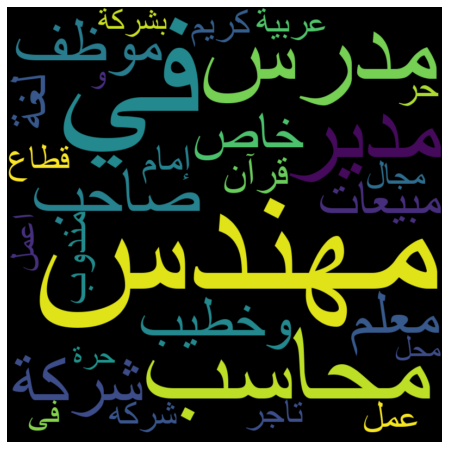

In [828]:
# Creating a word cloud for males jobs to count requent jobs

from collections import Counter
from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

def plot_word_cloud(text,f = 20):
    rtl = lambda w: get_display(reshape(f'{w}'))

    COUNTS = Counter(text.split())
    counts = {rtl(k):v for k, v in COUNTS.most_common(f)}
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                font_path='arial',
                min_font_size = 10).generate_from_frequencies(counts)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear")   
    plt.axis("off")
    plt.show()


#functions to covert array to string 
def word_cloud(x):

    comment_words = ''
# iterate through the csv file
    for val in x:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "

    reshaped_text = (comment_words)
    plot_word_cloud(reshaped_text,30)
#print((comment_words))
word_cloud(males_df['job'])

In [829]:
# encoding males jobs into categories

def encode_job_male(text):
    search = ['تدريس','محفظ','قرآن','خطيب','إمام','حرة','حر','خاص','تاجر','مندوب','محاسب','صاحب','مدير','هندس','معلم','مدرس']
    replace = ['موظف','إمام','أعمال حرة','تاجر','مندوب','محاسب','مدير','مهندس','مدرس']

    if search[0] in text or search[14] in text or search[15] in text:
        text = replace[8]
    
    elif search[11] in text or search[12] in text:
        text = replace[6]
    
    elif search[9] in text:
        text = replace[4]
    
    elif search[13] in text:
        text = replace[7]
    
    elif search[10] in text:
        text = replace[5]
    
    elif search[8] in text:
        text = replace[3]
    
    elif search[5] in text or search[6] in text or search[7] in text:
        text = replace[2]
    
    elif search[1] in text or search[2] in text or search[3] in text or search[4] in text:
        text = replace[1]
    
    else:
        text = replace[0]
    
    return text
    



In [830]:
new_males_df['job'] = males_df['job'].apply(lambda x: encode_job_male(x))
new_males_df['job'].unique()

array(['موظف', 'تاجر', 'إمام', 'مدير', 'مدرس', 'محاسب', 'مهندس',
       'أعمال حرة', 'مندوب'], dtype=object)

## **Show dataframe**

In [831]:
new_males_df.head(20)

,code,age,weight,height,color,nationality,education,job,status,area_level,...,maintain_prayer_time,maintain_prayer_masjid,accept_age,accept_weight,accept_height,accept_color,accept_education,accept_status,accept_dress,engage_period
1,2 رجال,37,90,185,ابيض,مصري,جامعي,موظف,مطلق,متوسط,...,نعم,نعم,33,65,165,1010,جامعي,"[مطلقه بدون اولاد, بكر]","[خمار, نقاب, طرحة]",6
2,3 رجال,30,70,160,قمحي,مصري,متوسط,تاجر,ارمل,مرتفع,...,نعم,غالبا,24,60,164,1000,متوسط,"[مطلقه بدون اولاد, ارمله, بكر]","[خمار, نقاب, طرحة]",3
3,6 رجال,30,95,170,قمحي,مصري,جامعي,إمام,اعزب,متوسط,...,غالبا,غالبا,22,130,170,1011,جامعي,"[مطلقه بدون اولاد, ارمله, بكر]","[خمار, نقاب, طرحة]",3
4,9 رجال,27,65,177,قمحي,مصري,متوسط,موظف,اعزب,متوسط,...,نعم,نعم,30,70,160,1111,متوسط,[ارمله],[نقاب],6
5,11 رجال,42,70,172,قمحي,مصري,فوق جامعي,مدير,اعزب,متوسط,...,نعم,نعم,32,75,177,1010,جامعي,[ارمله],[نقاب],12
6,4 رجال,42,72,165,قمحي,مصري,جامعي,إمام,متزوج,مرتفع,...,نعم,نعم,25,68,170,1000,جامعي,"[مطلقه بدون اولاد, ارمله, بكر]",[نقاب],3
7,5 رجال,44,85,176,ابيض,مصري,جامعي,مدرس,متزوج,متوسط,...,نعم,نعم,28,60,160,1111,جامعي,"[مطلقه بدون اولاد, ارمله, بكر]","[خمار, نقاب]",3
8,12 رجال,42,75,175,قمحي,مصري,فوق جامعي,محاسب,اعزب,متوسط,...,نعم,غالبا,28,68,164,1111,جامعي,[ارمله],"[خمار, نقاب]",6
9,13 رجال,37,75,167,ابيض,مصري,فوق جامعي,مدرس,اعزب,متوسط,...,نعم,غالبا,23,67,160,1000,جامعي,[ارمله],[نقاب],3
10,14 رجال,35,85,177,قمحي,مصري,جامعي,إمام,متزوج,متوسط,...,نعم,نعم,25,67,170,1000,جامعي,"[مطلقه بدون اولاد, ارمله, بكر]","[خمار, نقاب]",3


## **Save to .CSV**

In [832]:
# new_females_df.to_csv(r'G:\NU\Sp 2022\Data Analysis\Project\females_data.csv', index=False,encoding='utf-8')
# new_males_df.to_csv(r'G:\NU\Sp 2022\Data Analysis\Project\males_data.csv', index=False,encoding='utf-8')